## Symbolic Calculation

### Initialization

In [3]:
from sympy import *
from sympy.abc import i, j, k, l, r, N, n, m 
import math

# mu = N*u ➡ mutation rate of preference
# nu = N*v ➡ mutation rate of phenotype
mu, nu = symbols('mu, nu', real = True, positive = True)

# N ➡ population size
# n ➡ the number of preference
# M ➡ the number of phenotype
N, n, M = symbols('N, n, M', real = True, positive = True)

# continuous preference
p, q = symbols('p, q',real = True, positive = True)

# payoff
a, b = symbols('a, b',real = True, positive = True)

### $\lambda_{\ast}^{S/D}$

According to the results of Feng et al. (see Reference [10] in the article)

* $\lambda_{\ast}^S$
\begin{align}
    \lambda_1^S &\propto (\nu+1)(M(\mu+2)(3\mu+2\nu+3)+\nu(3\mu+2\nu+4))(\mu+\nu+3) \\
     \\
    \lambda_2^S &\propto M(2+\mu)(9+3\mu(4+\mu)+6\nu+5\mu\nu+\nu^2)+\nu(3\mu^3+2(2+\nu)((3+\nu)^2)+\mu^2(21+8\nu)+\mu(49+\nu(38+7\nu))) \\
     \\
    \lambda_3^S &\propto \mu(M(2+\mu)(9+3\mu(4+\mu)+7\nu+5\mu\nu+2\nu^2)+\nu(34+3\mu^3+40\nu+2\nu^2(8+\nu)+\mu(3+\nu)(16+7\nu)+\mu^2(21+8\nu)))
\end{align}

* $\lambda_{\ast}^D$
\begin{align}
    \lambda_1^D &\propto (M-1)\nu(1+\nu)(3+\mu+\nu)(4+3\mu+2\nu) \\
     \\
    \lambda_2^D &\propto (M-1)\nu(3\mu^3 + 2((2+\nu)(3+\nu)^2) + \mu^2(21+8\nu) + \mu(49+\nu(38+7\nu))) \\
     \\
    \lambda_3^D &\propto (M-1)\mu\nu(34+3\mu^3+40\nu+2\nu^2(8+\nu)+\mu(3+\nu)(16+7\nu)+\mu^2(21+8\nu))
\end{align}

the proportional ratio is
\begin{align}
    \chi = \dfrac{N^2\mu}{Mn(\mu+1)(\mu+2)(\nu+1)(\mu+\nu+1)(\mu+\nu+3)(3\mu+2\nu+6)}
\end{align}

In [5]:
# ratio
Chi = (N**2*mu)/(M*n*(mu+1)*(mu+2)*(nu+1)*(mu+nu+1)*(mu+nu+3)*(3*mu+2*nu+6))

$\lambda_1^S$

In [7]:
lambda_1S_propto = (nu+1)*(M*(mu+2)*(3*mu+2*nu+3)+nu*(3*mu+2*nu+4))*(mu+nu+3)
lambda_1S = lambda_1S_propto*Chi
lambda_1S_propto

(nu + 1)*(M*(mu + 2)*(3*mu + 2*nu + 3) + nu*(3*mu + 2*nu + 4))*(mu + nu + 3)

$\lambda_2^S$

In [9]:
lambda_2S_propto = M*(2+mu)*(9+3*mu*(4+mu)+6*nu+5*mu*nu+nu**2)+nu*(3*mu**3+2*(2+nu)*((3+nu)**2)+mu**2*(21+8*nu)+mu*(49+nu*(38+7*nu)))
lambda_2S = lambda_2S_propto*Chi
lambda_2S_propto

M*(mu + 2)*(5*mu*nu + 3*mu*(mu + 4) + nu**2 + 6*nu + 9) + nu*(3*mu**3 + mu**2*(8*nu + 21) + mu*(nu*(7*nu + 38) + 49) + (nu + 3)**2*(2*nu + 4))

$\lambda_3^S$

In [11]:
lambda_3S_propto = mu*(M*(2+mu)*(9+3*mu*(4+mu)+7*nu+5*mu*nu+2*nu**2)+nu*(34+3*mu**3+40*nu+2*nu**2*(8+nu)+mu*(3+nu)*(16+7*nu)+mu**2*(21+8*nu)))
lambda_3S = lambda_3S_propto*Chi
lambda_3S_propto

mu*(M*(mu + 2)*(5*mu*nu + 3*mu*(mu + 4) + 2*nu**2 + 7*nu + 9) + nu*(3*mu**3 + mu**2*(8*nu + 21) + mu*(nu + 3)*(7*nu + 16) + 2*nu**2*(nu + 8) + 40*nu + 34))

$\lambda_1^D$

In [13]:
lambda_1D_propto = (M-1)*nu*(1+nu)*(3+mu+nu)*(4+3*mu+2*nu)
lambda_1D = lambda_1D_propto*Chi
lambda_1D_propto

nu*(M - 1)*(nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 4)

$\lambda_2^D$

In [15]:
lambda_2D_propto = (M-1)*nu*(3*mu**3 + 2*((2+nu)*(3+nu)**2) + mu**2*(21+8*nu) + mu*(49+nu*(38+7*nu)))
lambda_2D = lambda_2D_propto*Chi
lambda_2D_propto

nu*(M - 1)*(3*mu**3 + mu**2*(8*nu + 21) + mu*(nu*(7*nu + 38) + 49) + 2*(nu + 2)*(nu + 3)**2)

$\lambda_3^D$

In [17]:
lambda_3D_propto = (M-1)*mu*nu*(34+3*mu**3+40*nu+2*nu**2*(8+nu)+mu*(3+nu)*(16+7*nu)+mu**2*(21+8*nu))
lambda_3D = lambda_3D_propto*Chi
lambda_3D_propto

mu*nu*(M - 1)*(3*mu**3 + mu**2*(8*nu + 21) + mu*(nu + 3)*(7*nu + 16) + 2*nu**2*(nu + 8) + 40*nu + 34)

### $C_{\ast}$

> \begin{align}
		&C_{p,2} = a \lambda_1^{\mathrm{S}}, \qquad \;\;\, C_{q,2} = b \lambda_1^{\mathrm{D}}, \notag \\
         \\
		&C_{p,1} = \dfrac{1}{2} a \lambda_3^{\mathrm{S}}, \qquad C_{q,1} = \dfrac{1}{2} b \lambda_3^{\mathrm{D}}, \notag \\
         \\
		&C_0 = -a (\dfrac{1}{3} \lambda_1^{\mathrm{S}} + \dfrac{1}{4} \lambda_3^{\mathrm{S}}) - b (\dfrac{1}{3} \lambda_1^{\mathrm{D}} + \dfrac{1}{4} \lambda_3^{\mathrm{D}}).
\end{align}

$C_{p,2}$

In [20]:
C_p_2 = a*lambda_1S_propto
C_p_2

a*(nu + 1)*(M*(mu + 2)*(3*mu + 2*nu + 3) + nu*(3*mu + 2*nu + 4))*(mu + nu + 3)

$C_{p,1}$

In [22]:
C_p_1 = (a*lambda_3S_propto)/2
C_p_1

a*mu*(M*(mu + 2)*(5*mu*nu + 3*mu*(mu + 4) + 2*nu**2 + 7*nu + 9) + nu*(3*mu**3 + mu**2*(8*nu + 21) + mu*(nu + 3)*(7*nu + 16) + 2*nu**2*(nu + 8) + 40*nu + 34))/2

$C_{q,2}$

In [24]:
C_q_2 = b*lambda_1D_propto
C_q_2

b*nu*(M - 1)*(nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 4)

$C_{q,1}$

In [26]:
C_q_1 = (b*lambda_3D_propto)/2
C_q_1

b*mu*nu*(M - 1)*(3*mu**3 + mu**2*(8*nu + 21) + mu*(nu + 3)*(7*nu + 16) + 2*nu**2*(nu + 8) + 40*nu + 34)/2

$C_0$

In [28]:
C_0 = -a*((lambda_1S_propto/3)+(lambda_3S_propto/4)) - b*((lambda_1D_propto/3)+(lambda_3D_propto/4))

In [29]:
C_0 = C_0.nsimplify()
C_0_a = C_0.subs(b, 0).subs(a, -1)
C_0_a_collect = 12*C_0_a
C_0_a_collect = collect(C_0_a_collect, M)
C_0_a_collect = M*factor(diff(C_0_a_collect, M)) + collect(factor(C_0_a_collect.subs(M, 0)), mu)
C_0_a_collect = collect(C_0_a_collect, [mu,nu])
C_0_a_collect/12

M*(mu + 2)*(9*mu**3 + mu**2*(27*nu + 48) + mu*(26*nu**2 + 89*nu + 75) + 8*nu**3 + 44*nu**2 + 72*nu + 36)/12 + nu*(9*mu**4 + mu**3*(24*nu + 63) + mu**2*(21*nu**2 + 123*nu + 156) + mu*(6*nu**3 + 68*nu**2 + 192*nu + 154) + 8*nu**3 + 48*nu**2 + 88*nu + 48)/12

In [30]:
C_0_b = C_0.subs(a, 0).subs(b, 1)
C_0_b_collect = 12*C_0_b
C_0_b_collect = factor(collect(C_0_b_collect, M))
C_0_b_collect = collect(C_0_b_collect, [mu,nu])
C_0_b_collect/12

-nu*(M - 1)*(9*mu**4 + mu**3*(24*nu + 63) + mu**2*(21*nu**2 + 123*nu + 156) + mu*(6*nu**3 + 68*nu**2 + 192*nu + 154) + 8*nu**3 + 48*nu**2 + 88*nu + 48)/12

### $\mathcal{D}(p,q)$

\begin{align}
    \mathcal{D}(p,q) = p^2 C_{p,2} + p \, C_{p,1} + q^2 C_{q,2} + q \, C_{q,1} + C_0.
\end{align}

Further,
\begin{align}
    \mathcal{D}(p) = 1 + \dfrac{\beta(1-u)}{Nu} \int_0^1 \mathcal{D}(p,q) \, dq = p^2 C_{p,2} + p \, C_{p,1} + \dfrac{1}{3}C_{q,2} + \dfrac{1}{2}C_{q,1} + C_0 +1, \\
     \\
    \mathcal{D}(q) = 1 + \dfrac{\beta(1-u)}{Nu} \int_0^1 \mathcal{D}(p,q) \, dp = \dfrac{1}{3}C_{p,2} + \dfrac{1}{2}C_{p,1} +q^2 C_{q,2} + q \, C_{q,1} + C_0 +1.
\end{align}

In [32]:
D_p_q = C_p_2*p**2 +C_p_1*p + C_q_2*q**2 + C_q_1*q + C_0
D_p = C_p_2*p**2 +C_p_1*p + C_q_2/3 + C_q_1/2 + C_0 + 1
D_q = C_p_2/3 +C_p_1/2 + C_q_2*q**2 + C_q_1*q + C_0 + 1

\begin{align}
		\langle \, p \, \rangle = \int_0^1 p \mathcal{D}(p) \, dp \propto \; & \dfrac{1}{24} a(\mu+2)(\mu+ \nu+1)(3\mu+ 2\nu+6) \left[ \nu(\mu+ \nu+2) + M(\mu + 2\nu+3) \right] + \dfrac{1}{2}
\end{align}

In [34]:
p_angle = factor(integrate(p*(D_p-1), (p, 0, 1)))
p_angle = factor(p_angle.nsimplify())
p_angle = collect(p_angle, M)
p_angle = p_angle + 1/2
p_angle

a*(mu + 2)*(mu + nu + 1)*(3*mu + 2*nu + 6)*(M*(mu + 2*nu + 3) + mu*nu + nu**2 + 2*nu)/24 + 0.5

\begin{align}
    \langle \, q \, \rangle = \int_0^1 q \mathcal{D}(q) \, dq \propto \; & \dfrac{1}{24} b(\mu+2)(\mu+ \nu+1)(3\mu + 2\nu+6)\nu(\mu+ \nu+2)(M-1) + \dfrac{1}{2}
\end{align}

In [36]:
q_angle = factor(integrate(q*(D_q-1), (q, 0, 1)))
q_angle = factor(q_angle.nsimplify())
q_angle = q_angle + 1/2
q_angle

b*nu*(M - 1)*(mu + 2)*(mu + nu + 1)*(mu + nu + 2)*(3*mu + 2*nu + 6)/24 + 0.5

\begin{align}
    \langle \, p \, \rangle > \langle \, q \, \rangle \Longleftrightarrow a>Kb,
\end{align}



\begin{align}
    K = \dfrac{\nu(M - 1)(\mu + \nu + 2)}{M(\mu + 2\nu + 3) + \nu (\mu + \nu + 2)}.
\end{align}

In [38]:
K = (q_angle-1/2)/(p_angle-1/2)*(a/b)
K

nu*(M - 1)*(mu + nu + 2)/(M*(mu + 2*nu + 3) + mu*nu + nu**2 + 2*nu)

\begin{align}
    P(p>q) = \int_0^1 \int_0^p \mathcal{D}(p, q) \, dqdp \propto a(\nu (\mu+\nu+2) + M(\mu+2\nu+3)) - b(M-1)(\mu+\nu+2).
\end{align}

\begin{align}
    P(p > q) > 0 \Longleftrightarrow a > Kb.
\end{align}

In [40]:
P_p_q = factor(integrate(D_p_q, (q, 0, p), (p, 0, 1)))
P_p_q

(mu + 2)*(mu + nu + 1)*(3*mu + 2*nu + 6)*(M*a*mu + 2*M*a*nu + 3*M*a - M*b*mu*nu - M*b*nu**2 - 2*M*b*nu + a*mu*nu + a*nu**2 + 2*a*nu + b*mu*nu + b*nu**2 + 2*b*nu)/24

In [41]:
chi = (mu+2)*(mu+nu+1)*(3*mu+2*nu+6)/24
P_p_q_propto = P_p_q/chi
P_p_q_propto = collect(collect(collect(P_p_q_propto, [a,b]), M), mu*nu+nu**2+2*nu)
P_p_q_propto

a*(M*(mu + 2*nu + 3) + mu*nu + nu**2 + 2*nu) + b*(1 - M)*(mu*nu + nu**2 + 2*nu)

## Visualization

### Module

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec
from yuxin_helpers.colors import *
import colormaps as cmaps

In [45]:
# font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}"
})

### FIG. 2

* $a=\dfrac{3}{4}$, $b=1$

\begin{align}
    a>Kb \Longrightarrow 0 < \nu < \dfrac{14-4M\mu-2M+7\mu+\sqrt{16M^2\mu^2+64M^2\mu+148M^2-56M\mu^2-224M\mu-308M+49\mu^2+196\mu+196}}{2(4M-7)}
\end{align}

>\begin{align}
    M=2 \Longrightarrow 0 < \nu < -\dfrac{\mu}{2} + \dfrac{\sqrt{\mu^2+4\mu+172}}{2} + 5
\end{align}
\begin{align}
    M=3 \Longrightarrow 0 < \nu < -\dfrac{\mu}{2} + \dfrac{\sqrt{25\mu^2+100\mu+604}}{10} + \dfrac{4}{5}
\end{align}
\begin{align}
    M \to \infty \Longrightarrow 0 < \nu < -\dfrac{\mu}{2} + \dfrac{\sqrt{16\mu^2 + 64\mu + 148}}{8} - \dfrac{1}{4}
\end{align}

---

* $a=\dfrac{1}{10}$, $b=1$

\begin{align}
    a>Kb \Longrightarrow 0 < \nu < \dfrac{22-10M\mu-18M+11\mu+\sqrt{100M^2\mu^2+400M^2\mu+444M^2-220M\mu^2-880M\mu-924M+121\mu^2+484\mu+484}}{2(4M-7)}
\end{align}

>\begin{align}
    M=2 \Longrightarrow 0 < \nu < -\dfrac{\mu}{2} + \dfrac{\sqrt{81\mu^2+324\mu+412}}{18} - \dfrac{7}{9}
\end{align}
\begin{align}
    M=3 \Longrightarrow 0 < \nu < -\dfrac{\mu}{2} + \dfrac{\sqrt{361\mu^2+1444\mu+1708}}{38} - \dfrac{16}{19}
\end{align}
\begin{align}
    M \to \infty \Longrightarrow 0 < \nu < -\dfrac{\mu}{2} + \dfrac{\sqrt{100\mu^2 + 400\mu + 444}}{20} - \dfrac{18}{20}
\end{align}

#### Function

In [49]:
def figure_2():
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1]) 
    
    ######################################################################################################################################
    ##############################################################  a  ###################################################################
    ######################################################################################################################################

    # surface
    def func(x, z):
        numerator = -(4*z*x + 2*z - 7*x - np.sqrt(16*z**2*x**2 + 64*z**2*x + 148*z**2 - 56*z*x**2 - 224*z*x - 308*z + 49*x**2 + 196*x + 196) - 14)
        denominator = 2 * (4*z - 7)
        return numerator / denominator
    
    x = np.linspace(0, 10, 400)
    z = np.linspace(2, 11, 400)
    X, Z = np.meshgrid(x, z)
    Y = func(X, Z)

    axs[0,0].set_axis_off()
    axs[0,0] = fig.add_subplot(gs[0,0], projection='3d')
    axs[0,0].plot_surface(X, Y, Z, color='#3680AE', shade=False, alpha=0.95)
    
    # intersecting line
    def compute_y(x):
        return -x / 2 + np.sqrt(x**2 + 4*x + 172) / 2 + 5
    
    x = np.linspace(0, 10, 400)
    z = np.linspace(0, 2, 100)
    X, Z = np.meshgrid(x, z)
    Y = compute_y(X)
    axs[0,0].contour(X, Y, Z, levels=[1.99], colors='black', linewidths=2, linestyles='--', zorder = 5)
    
    ############################################################## lateral ###############################################################
    
    def compute_z(x, y):
        return x-x+11
    x = np.linspace(0, 10, 400)
    y = np.linspace(0, 1.52, 400)    
    X, Y = np.meshgrid(x, y)
    Z = compute_z(X, Y)
    axs[0,0].plot_surface(X, Y, Z, color="#3680AE", shade=False, alpha=0.6)
        
    def compute(x, y):
        return x-x+10
    
    y_z_intervals = [(0,1.1,2,11), (1.1,1.5,2,10), (1.5,2,2,5), (2,2.5,2,3.5), (2.5,3.5,2,3), (3.5,5,2,2.5), (5,7,2,2.2), (7,8.8345,2,2.1)]
    for y_start, y_end, z_start, z_end in y_z_intervals:
        y = np.linspace(y_start, y_end, 40)
        z = np.linspace(z_start, z_end, 40)
        Y, Z = np.meshgrid(y, z)
        X = compute(Y, Z)
        axs[0, 0].plot_surface(X, Y, Z, color="#3680AE", shade=False, alpha=0.3)
    
    def compute(x, z):
        return x-x
    x = np.linspace(0, 10, 400)
    z = np.linspace(2, 11, 400)
    X, Z = np.meshgrid(x, z)
    Y = compute(X, Z)
    axs[0,0].plot_surface(X, Y, Z, color="#3680AE", shade=False, alpha=0.5)
    
    def compute(x, y):
        return x-x+2
    x = np.linspace(0, 10, 400)
    y = np.linspace(0, 8.8345, 400)
    X, Y = np.meshgrid(x, y)
    Z = compute(X, Y)
    axs[0,0].plot_surface(X, Y, Z, color="#3680AE", shade=False, alpha=0.2)
    
    ######################################################################################################################################
    
    # marks
    axs[0,0].text(5, 11.8, 2, r"$\mu$", fontsize=12, va='top', ha='left')
    axs[0,0].text(10.5, 5, 2, r"$\nu$", fontsize=12, va='top', ha='left')
    axs[0,0].text(12, 0, 7, r"$M$", fontsize=12, va='top', ha='left')
    axs[0,0].text(12, 0, 16.2, r"$\textbf{a}$", fontsize=22.5, va='top', ha='left')

    # coordinate axises and coordinate planes
    axs[0,0].set_xlim(0.01, 9.5)
    axs[0,0].set_ylim(0.01, 11.3)
    axs[0,0].set_zlim(2, 10)
    axs[0,0].grid(False)
    axs[0,0].xaxis.pane.fill = False
    axs[0,0].yaxis.pane.fill = False
    axs[0,0].zaxis.pane.fill = False
    axs[0,0].xaxis.pane.set_edgecolor('none')
    axs[0,0].yaxis.pane.set_edgecolor('none')
    axs[0,0].zaxis.pane.set_edgecolor('none')

    # display angle
    axs[0,0].view_init(elev=20, azim=20)
    
    ######################################################################################################################################
    ##############################################################  c  ###################################################################
    ######################################################################################################################################

    # surface
    def func(x, z):
        numerator = -(10*z*x + 18*z - 11*x - np.sqrt(100*z**2*x**2 + 400*z**2*x + 444*z**2 - 220*z*x**2 - 880*z*x - 924*z + 121*x**2 + 484*x + 484) - 22)
        denominator = 2 * (10*z - 11)
        return numerator / denominator

    x = np.linspace(0, 10, 400)
    z = np.linspace(2, 11, 400)
    X, Z = np.meshgrid(x, z)
    Y = func(X, Z)

    axs[1,0].set_axis_off()
    axs[1,0] = fig.add_subplot(gs[1,0], projection='3d')
    axs[1,0].plot_surface(X, Y, Z, color='#3680AE', shade=False, alpha=0.95)
    
    # intersecting line
    def compute_y(x):
        return -x / 2 + np.sqrt(81*x**2 + 324*x + 412) / 18 - 7/9
    
    x = np.linspace(0, 10, 400)
    z = np.linspace(0, 2, 100)
    X, Z = np.meshgrid(x, z)
    Y = compute_y(X)
    axs[1,0].contour(X, Y, Z, levels=[1.99], colors='black', linewidths=2, linestyles='--', zorder = 5)
    
    ########################################################### laterals #################################################################
    
    def compute_z(x, y):
        return x-x+11
    ranges = [(0,0.5,0.17), (0.5,1.5,0.165), (1.5,3,0.147), (3,6,0.138), (6,10,0.128)]
    for start_x, end_x, max_y in ranges:
        x = np.linspace(start_x, end_x, 400)
        y = np.linspace(0, max_y, 400)
        X, Y = np.meshgrid(x, y)
        Z = compute_z(X, Y)
        axs[1,0].plot_surface(X, Y, Z, color="#3680AE", shade=False, alpha=0.6)
    
    def compute(x, y):
        return x-x+10
    y_intervals = [(0, 0.13), (0.13, 0.14), (0.14, 0.15), (0.15, 0.16), (0.16, 0.17), (0.17, 0.18), (0.18, 0.20), (0.20, 0.21), (0.21, 0.22), (0.22, 0.23), (0.23, 0.2448)]
    z_intervals = [(2, 11), (2, 9.5), (2, 6.5), (2, 4.2), (2, 3.7), (2, 3.5), (2, 3), (2, 2.5), (2, 2.35), (2, 2.2), (2, 2.15)]
    for y_range, z_range in zip(y_intervals, z_intervals):
        y = np.linspace(y_range[0], y_range[1], 40)
        z = np.linspace(z_range[0], z_range[1], 40)
        Y, Z = np.meshgrid(y, z)
        X = compute(Y, Z)
        axs[1,0].plot_surface(X, Y, Z, color="#3680AE", shade=False, alpha=0.3)
    
    def compute(x, z):
        return x-x
    x = np.linspace(0, 10, 400)
    z = np.linspace(2, 11, 400)
    X, Z = np.meshgrid(x, z)
    Y = compute(X, Z)
    axs[1,0].plot_surface(X, Y, Z, color="#3680AE", shade=False, alpha=0.5)
    
    def compute(x, y):
        return x-x+2
    x = np.linspace(0, 10, 400)
    y = np.linspace(0, 0.2448, 400)
    X, Y = np.meshgrid(x, y)
    Z = compute(X, Y)
    axs[1,0].plot_surface(X, Y, Z, color="#3680AE", shade=False, alpha=0.2)
    
    ######################################################################################################################################
    
    # marks
    axs[1,0].text(5, 0.36, 2, r"$\mu$", fontsize=12, va='top', ha='left')
    axs[1,0].text(10.5, 0.16, 2, r"$\nu$", fontsize=12, va='top', ha='left')
    axs[1,0].text(12, 0, 7, r"$M$", fontsize=12, va='top', ha='left')
    axs[1,0].text(12, 0, 16, r"$\textbf{c}$", fontsize=22.5, va='top', ha='left')

    # coordinate axises and coordinate planes
    axs[1,0].set_xlim(0, 9.5)
    axs[1,0].set_ylim(0, 0.342)
    axs[1,0].set_zlim(2, 10)
    axs[1,0].grid(False)
    axs[1,0].xaxis.pane.fill = False
    axs[1,0].yaxis.pane.fill = False
    axs[1,0].zaxis.pane.fill = False
    axs[1,0].xaxis.pane.set_edgecolor('none')
    axs[1,0].yaxis.pane.set_edgecolor('none')
    axs[1,0].zaxis.pane.set_edgecolor('none')

    # display angle
    axs[1,0].view_init(elev=20, azim=20)
    
    ######################################################################################################################################
    ##############################################################  b  ###################################################################
    ######################################################################################################################################
    
    axs[0,1] = fig.add_subplot(gs[0,1])
    
    def func_1(x):
        return -x / 2 + np.sqrt(x**2 + 4*x + 172) / 2 + 5
    def func_2(x):
        return -x / 2 + np.sqrt(25*x**2 + 100*x + 604) / 10 + 4/5
    def func_oo(x):
        return -x / 2 + np.sqrt(16*x**2 + 64*x + 148) / 8 - 1/4
    
    x = np.linspace(0, 10, 400)
    y_1 = func_1(x)
    y_2 = func_2(x)
    y_4 = func_oo(x)

    # boundary curves
    axs[0,1].plot(x, y_1, color='k', linewidth=0.8, linestyle='--')
    axs[0,1].plot(x, y_2, color='k', linewidth=0.8, linestyle='--')
    axs[0,1].plot(x, y_4, color='k', linewidth=0.8, linestyle='--')

    # # areas
    axs[0,1].fill_between(x, y_1, color='#3680AE', alpha=0.2)
    axs[0,1].fill_between(x, y_2, color='#3680AE', alpha=0.45)
    axs[0,1].fill_between(x, y_4, color='#3680AE', alpha=0.6)

    # trend arrow
    axs[0,1].annotate('',
                 xy=(3, 1.3), xycoords='data',
                 xytext=(6.5, 9.7), textcoords='data',
                 arrowprops=dict(edgecolor='#14263D', facecolor='#14263D', shrink=0.05, headwidth=4, width=0.5))

    # marks
    axs[0,1].text(6.5, 8.475,r'$M = 2$', fontweight='bold', fontsize=12)
    axs[0,1].text(6, 2.75,r'$M = 3$', fontweight='bold', fontsize=12)
    axs[0,1].text(4, 0.5,r'$M \rightarrow \infty$', fontweight='bold', fontsize=12)
    axs[0,1].text(0.45, 4.75,r'$homophily$', fontname='Times New Roman', fontstyle='italic', fontsize=14)
    axs[0,1].text(-1.7, 9.5,r'$\textbf{b}$', fontweight='bold', fontsize=20)

    # coordinate axises
    axs[0,1].set_axis_off()
    axs[0,1].set_xlabel(r'$\mu$', fontsize=14)
    axs[0,1].set_ylabel(r'$\nu$', fontsize=14)
    axs[0,1].set_xlim(0, 10)
    axs[0,1].set_ylim(0, 10)
    axs[0,1].grid(False)
    
    ######################################################################################################################################
    ##############################################################  d  ###################################################################
    ######################################################################################################################################
    
    axs[1,1] = fig.add_subplot(gs[1,1])

    def func_11(x):
        return -x / 2 + np.sqrt(81*x**2 + 324*x + 412) / 18 - 7/9
    def func_12(x):
        return -x / 2 + np.sqrt(361*x**2 + 1444*x + 1708) / 38 - 16/19
    def func_1oo(x):
        return -x / 2 + np.sqrt(100*x**2 + 400*x + 444) / 20 - 18/20

    x = np.linspace(0, 10, 400)
    y_11 = func_11(x)
    y_12 = func_12(x)
    y_14 = func_1oo(x)
    
    # boundary curves
    axs[1,1].plot(x, y_11, color='k', linewidth=0.8, linestyle='--')
    axs[1,1].plot(x, y_12, color='k', linewidth=0.8, linestyle='--')
    axs[1,1].plot(x, y_14, color='k', linewidth=0.8, linestyle='--')

    # areas
    axs[1,1].fill_between(x, y_11, color='#3680AE', alpha=0.2)
    axs[1,1].fill_between(x, y_12, color='#3680AE', alpha=0.45)
    axs[1,1].fill_between(x, y_14, color='#3680AE', alpha=0.6)

    # trend arrow
    axs[1,1].annotate('',
                 xy=(4, 0.12), xycoords='data',
                 xytext=(5.3, 0.25), textcoords='data',
                 arrowprops=dict(edgecolor='#14263D', facecolor='#14263D', shrink=0.05, headwidth=4, width=0.5))

    # marks
    axs[1,1].text(6.5, 0.265,r'$M = 2$', fontweight='bold', fontsize=12)
    axs[1,1].text(6, 0.19,r'$M = 3$', fontweight='bold', fontsize=12)
    axs[1,1].text(5, 0.125,r'$M \rightarrow \infty$', fontweight='bold', fontsize=12)
    axs[1,1].text(0.75, 0.235,r'$homophily$', fontname='Times New Roman', fontstyle='italic', fontsize=14)
    axs[1,1].text(-1.7, 0.33,r'$\textbf{d}$', fontweight='bold', fontsize=20)

    # coordinate axises
    axs[1,1].set_axis_off()
    axs[1,1].set_xlabel(r'$\mu$', fontsize=14)
    axs[1,1].set_ylabel(r'$\nu$', fontsize=14)
    axs[1,1].set_xlim(0, 10)
    axs[1,1].set_ylim(0, 0.35)
    axs[1,1].grid(False)
    
    ######################################################################################################################################
    ######################################################################################################################################
    ######################################################################################################################################
    
    #plt.savefig('M_mu_nu_new.png', format='png', dpi = 400)
    
    plt.show()
    

#### Figure

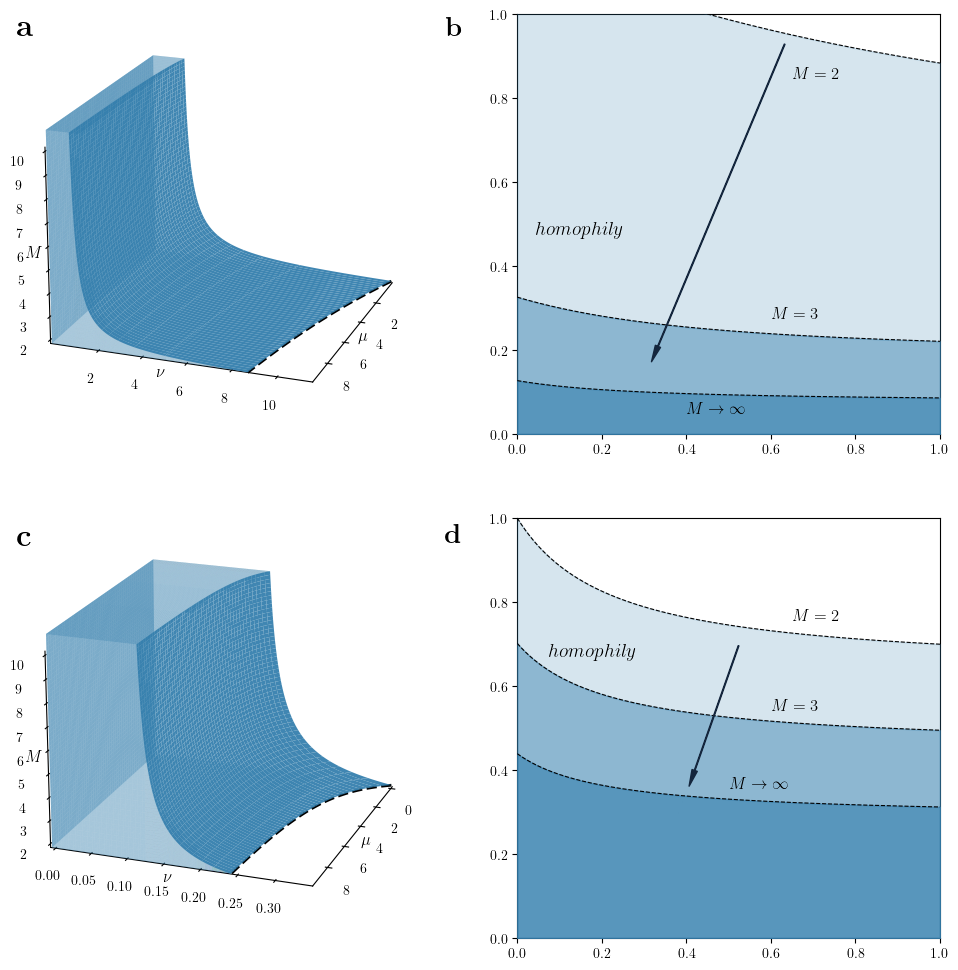

In [51]:
figure_2()

### FIG. 3



#### Function

In [54]:
def figure_3():
    x_min, x_max = -10, 10
    y_min, y_max = -10, 10
    x = np.linspace(x_min, x_max, 400)
    y = np.linspace(y_min, y_max, 400)
    
    fig, ax = plt.subplots(figsize=(8, 8))

    # boundary lines
    ax.plot(x, 2/9 * x, 'k--')
    ax.plot(x, -2/9 * x, 'k--')
    
    b_fill = np.linspace(-2, 2, 100)
    a_fill = (2/9) * b_fill

    # color the range
    ax.fill_between(b_fill, a_fill, 1, color='#82AAE7', alpha=0.6, label=r'$a > \frac{2}{9}b$')
    ax.fill_between(b_fill, a_fill, -1, color='#E9B6BE', alpha=0.5, label=r'$a > \frac{2}{9}b$')

    # coordinate axises
    ax.annotate('',
                xy=(0, 4/9), xycoords='data',
                xytext=(0, -4/9), textcoords='data',
                arrowprops=dict(edgecolor='black', facecolor='black', shrink=0, headwidth=5, width=0.7))
    ax.annotate('',
                xy=(2, 0), xycoords='data',
                xytext=(-2, 0), textcoords='data',
                arrowprops=dict(edgecolor='black', facecolor='black', shrink=0, headwidth=5, width=0.7))

    # marking arrows
    ax.annotate('',
                xy=(1.45, 4/9-2/9*0.25), xycoords='data',
                xytext=(1.6, 4/9-2/9*0.4), textcoords='data',
                arrowprops=dict(edgecolor='black', facecolor='black', shrink=0, headwidth=3, headlength=5, width=0.1))
    ax.annotate('',
                xy=(-1.48, -4/9+2/9*0.20), xycoords='data',
                xytext=(-1.64, -4/9+2/9*0.36), textcoords='data',
                arrowprops=dict(edgecolor='black', facecolor='black', shrink=0, headwidth=3, headlength=5, width=0.1))

    # marks
    ax.text(-0.15, 380/900, r'$a$', fontsize=19)
    ax.text(1.9, -35/900, r'$b$', fontsize=19)
    ax.text(1.15, 365/900, r'$homophily$', fontsize=14)
    ax.text(-1.7, -380/900, r'$heterophily$', fontsize=14)
    ax.text(0.05, 275/900, r'$[1,1]>[1,0]>[0,1]>[0,0]$', fontsize=11)
    ax.text(-1.21, 275/900, r'$[1,0]>[1,1]>[0,0]>[0,1]$', fontsize=11)
    ax.text(0.05, -285/900, r'$[0,1]>[0,0]>[1,1]>[1,0]$', fontsize=11)
    ax.text(-1.21, -285/900, r'$[0,0]>[0,1]>[1,0]>[1,1]$', fontsize=11)
    ax.text(0.74, 120/900, r'$[1,1]>[0,1]>[1,0]>[0,0]$', fontsize=11)
    ax.text(-1.9, 120/900, r'$[1,0]>[0,0]>[1,1]>[0,1]$', fontsize=11)
    ax.text(0.74, -130/900, r'$[0,1]>[1,1]>[0,0]>[1,0]$', fontsize=11)
    ax.text(-1.9, -130/900, r'$[0,0]>[1,0]>[0,1]>[1,1]$', fontsize=11)

    # ranges
    ax.set_xlim(-2, 2)
    ax.set_ylim(-4/9, 4/9)
    
    ax.axis('off')
    
    #plt.savefig('a_b_p_q.png', format='png', dpi = 400)
    
    plt.show()
    

#### Figure

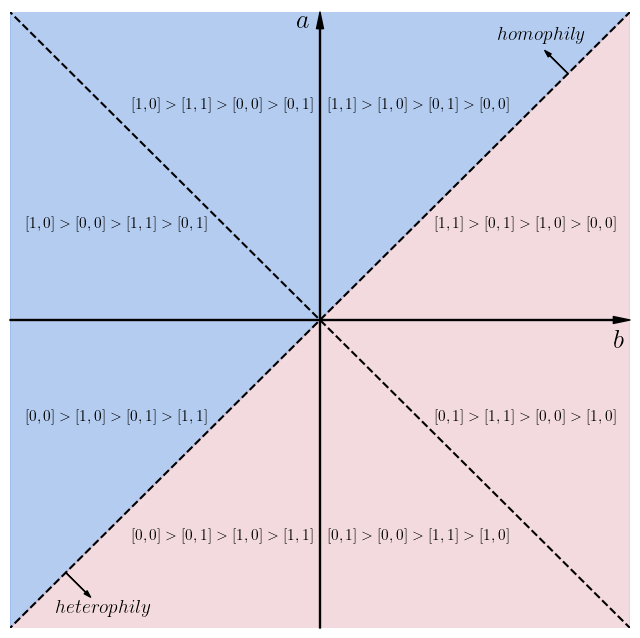

In [56]:
figure_3()

### FIG. 4

* $\mu= 1.2$, $\nu = 1.8$, $M = 3$

\begin{align}
    \mathcal{D}(p,q) = 1983.744 \, \textcolor{blue}{a} \, \textcolor{red}{p^2} + 753.408 \, \textcolor{blue}{a} \, \textcolor{red}{p} + 677.376 \, \textcolor{blue}{b} \, \textcolor{red}{q^2} + 843.264 \, \textcolor{blue}{b} \, \textcolor{red}{q} - 1037.952 \, \textcolor{blue}{a} - 647.424 \, \textcolor{blue}{b}
\end{align}

#### Function

In [60]:
def figure_4():
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    
    X, Y = np.meshgrid(x, y)
    
    fig, axes = plt.subplots(4, 4, figsize=(11, 11))

    # colorbar
    colors = ["#97D1AD","#FFFFFF","#116DA9"]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    cmap = truncate_colormap(cmap, 0.1, 0.9)
    
    ############################################################### a ###################################################################
    
    b = -1
    a = 0

    # equation of the surface
    def equation_0_0(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation_0_0(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)

    # heatmap
    axes[0,0].contourf(X, Y, Z, levels=levels, cmap=cmap)
    
    # the curve D(p,q)=0
    axes[0,0].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')

    # title
    axes[0,0].set_title(r'$a = 0, b = -1$', fontname='Times New Roman', fontweight='bold', fontsize=12)

    # label
    axes[0,0].text(-0.075, 1.1, r'\textbf{a}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### b ###################################################################
    
    b = 1
    a = 0
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[0,1].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[0,1].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[0,1].set_title(r'$a = 0, b = 1$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[0,1].text(-0.075, 1.1, r'\textbf{b}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### c ###################################################################
    
    b = 0
    a = 1
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[0,2].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[0,2].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[0,2].set_title(r'$a = 1, b = 0$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[0,2].text(-0.075, 1.1, r'\textbf{c}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### d ###################################################################
    
    b = 0
    a = -1
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[0,3].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[0,3].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[0,3].set_title(r'$a = -1, b = 0$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[0,3].text(-0.075, 1.1, r'\textbf{d}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### e ###################################################################
    
    b = 1
    a = 1
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[1,0].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[1,0].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[1,0].set_title(r'$a = 1, b = 1$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[1,0].text(-0.075, 1.1, r'\textbf{e}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### f ###################################################################
    
    b = -1
    a = 1
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[1,1].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[1,1].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[1,1].set_title(r'$a = 1, b = -1$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[1,1].text(-0.075, 1.1, r'\textbf{f}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### g ###################################################################
    
    b = -1
    a = -1
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[1,2].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[1,2].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[1,2].set_title(r'$a = -1, b = -1$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[1,2].text(-0.075, 1.1, r'\textbf{g}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### h ###################################################################
    
    b = 1
    a = -1
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[1,3].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[1,3].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[1,3].set_title(r'$a = -1, b = 1$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[1,3].text(-0.075, 1.1, r'\textbf{h}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### i ###################################################################
    
    a = 1
    b = 901/758
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[2,0].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[2,0].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[2,0].set_title(r'$a = 1, b = 901/758$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[2,0].text(-0.075, 1.1, r'\textbf{i}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### j ###################################################################
    
    a = 1
    b = -901/562
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[2,1].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[2,1].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[2,1].set_title(r'$a = 1, b = -901/562$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[2,1].text(-0.075, 1.1, r'\textbf{j}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### k ###################################################################
    
    a = -1
    b = -901/758
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[2,2].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[2,2].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[2,2].set_title(r'$a = -1, b = -901/758$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[2,2].text(-0.075, 1.1, r'\textbf{k}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### l ###################################################################
    
    a = -1
    b = 901/562
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[2,3].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[2,3].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[2,3].set_title(r'$a = -1 , b = 901/562$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[2,3].text(-0.075, 1.1, r'\textbf{l}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### m ###################################################################
    
    a = 562/1475
    b = 1
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[3,0].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[3,0].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[3,0].set_title(r'$a = 562/1475, b = 1$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[3,0].text(-0.075, 1.1, r'\textbf{m}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### n ###################################################################
    
    a = 758/1475
    b = -1
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[3,1].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[3,1].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[3,1].set_title(r'$a = 758/1475, b = -1$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[3,1].text(-0.075, 1.1, r'\textbf{n}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### o ###################################################################
    
    a = -562/1475
    b = -1
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[3,2].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[3,2].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[3,2].set_title(r'$a = -562/1475, b = -1$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[3,2].text(-0.075, 1.1, r'\textbf{o}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')
    
    ############################################################### p ###################################################################
    
    a = -758/1475
    b = 1
    def equation(x, y):
        return 1983.744 * a * x**2 + 753.408 * a * x + 677.376 * b * y**2 + 843.264 * b * y - 1037.952 * a - 647.424 * b
    Z = equation(X, Y)
    max_Z = np.max(Z)
    min_Z = np.min(Z)
    max_abs_Z = max(np.abs(max_Z), np.abs(min_Z))
    levels = np.linspace(-max_abs_Z, max_abs_Z, 1000)
    axes[3,3].contourf(X, Y, Z, levels=levels, cmap=cmap)
    axes[3,3].contour(X, Y, Z, levels=[0], colors='black', linestyles='dashed')
    axes[3,3].set_title(r'$a = -758/1475, b = 1$', fontname='Times New Roman', fontweight='bold', fontsize=12)
    axes[3,3].text(-0.075, 1.1, r'\textbf{p}', fontsize=13, fontname='Arial', fontweight='bold', ha='center', va='center')

    #####################################################################################################################################
    ####################################################### coordinate axises ###########################################################
    #####################################################################################################################################
    
    for i in range(4):
        for j in range(4):
            ax = axes[i,j]

            # close the original axises
            ax.set_aspect('equal')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.axis('off')
            ax.grid(False)

            # show the new axises by arrows
            ax.annotate('',
                        xy=(0, 1), xycoords='data',
                        xytext=(0, 0), textcoords='data',
                        arrowprops=dict(edgecolor='black', facecolor='black', shrink=0, headwidth=5, width=0.3))
            ax.annotate('',
                        xy=(1, 0), xycoords='data',
                        xytext=(0, 0), textcoords='data',
                        arrowprops=dict(edgecolor='black', facecolor='black', shrink=0, headwidth=5, width=0.3))

            # labels
            ax.text(-0.05, -0.05, r'$0$', fontsize=13, fontname='Times New Roman', fontweight='bold', ha='center', va='center')
            ax.text(1, -0.075, r'$p$', fontsize=13, fontname='Times New Roman', fontweight='bold', fontstyle='italic',
                    ha='center', va='center')
            ax.text(-0.075, 1, r'$q$', fontsize=13, fontname='Times New Roman', fontweight='bold', fontstyle='italic',
                    ha='center', va='center')

    # show the colorbar
    contour = axes[3,3].contourf(X, Y, Z, levels=levels, cmap=cmap)
    cbar = fig.colorbar(contour, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.outline.set_visible(False)
    cbar.set_ticks([])
    plt.figtext(0.88885, 0.665, r'$\mathcal{D}(p,q)$', fontname='Times New Roman', fontweight='bold', fontstyle='italic',
                ha='center', fontsize=14)
    
    #####################################################################################################################################
    
    #plt.savefig('Sociality_D_pq_2D.png', format='png', dpi = 400)
    
    plt.show()
    

#### Figure

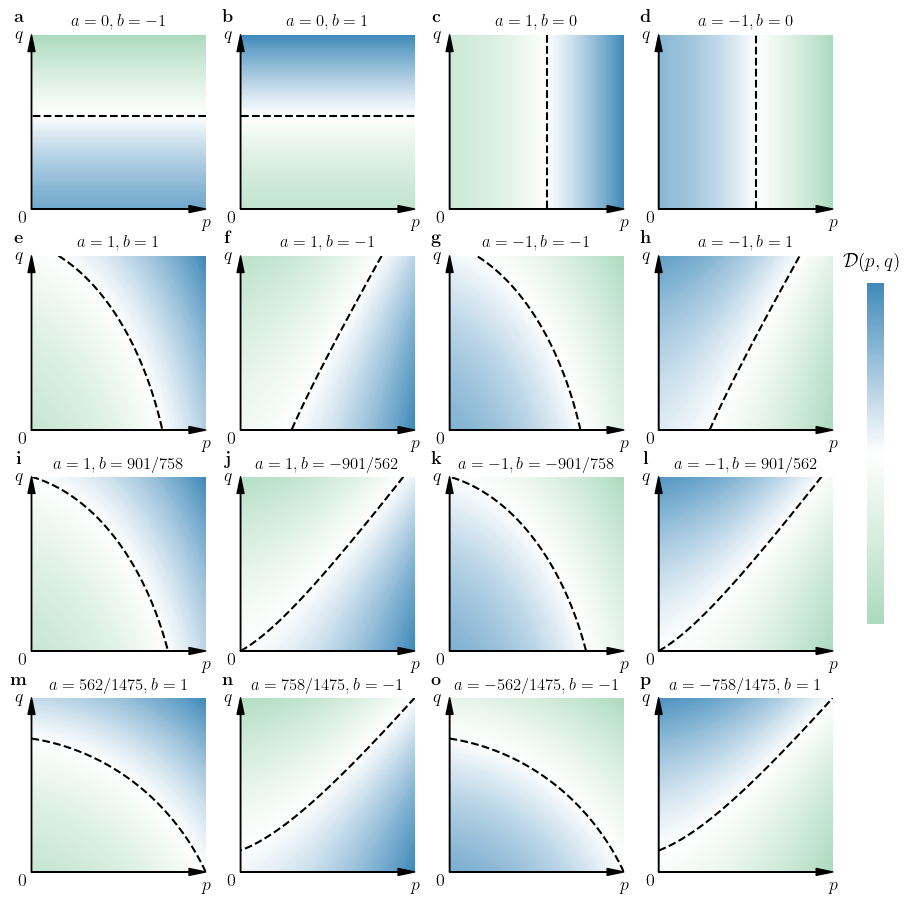

In [62]:
figure_4()